In [35]:
import pandas as pd
import numpy as np

pd.set_option('max_colwidth', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.1f' % x)

import matplotlib.pyplot as plt
%config IPCompleter.greedy == True

plt.style.use('ggplot')

import os
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
cars = pd.read_csv('cars.csv', encoding='cp1251', sep=',').replace('"', '')
cars.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57;;;;;;;;
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50;;;;;;;;
2,2016-03-14 12:52:21,Jeep_Grand_Cherokee_Overland,privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46;;;;;;;;


In [3]:
cars.columns = [i.replace(';', '') for i in cars.columns]
cars.lastSeen = [i.replace(';', '') for i in cars.lastSeen]

# Описательная статистика

In [4]:
cars.shape

(371824, 20)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371824 entries, 0 to 371823
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371824 non-null  object
 1   name                 371824 non-null  object
 2   seller               371824 non-null  object
 3   offerType            371824 non-null  object
 4   price                371824 non-null  int64 
 5   abtest               371824 non-null  object
 6   vehicleType          333925 non-null  object
 7   yearOfRegistration   371824 non-null  int64 
 8   gearbox              351601 non-null  object
 9   powerPS              371824 non-null  int64 
 10  model                351326 non-null  object
 11  kilometer            371824 non-null  int64 
 12  monthOfRegistration  371824 non-null  int64 
 13  fuelType             338409 non-null  object
 14  brand                371824 non-null  object
 15  notRepairedDamage    299700 non-nu

In [6]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,371824.0,371824.0,371824.0,371824.0,371824.0,371824.0,371824.0
mean,17286.3,2004.6,115.5,125618.6,5.7,0.0,50821.7
std,3586525.4,92.8,192.1,40111.6,3.7,0.0,25798.8
min,0.0,1000.0,0.0,5000.0,0.0,0.0,1067.0
25%,1150.0,1999.0,70.0,125000.0,3.0,0.0,30459.0
50%,2950.0,2003.0,105.0,150000.0,6.0,0.0,49610.0
75%,7200.0,2008.0,150.0,150000.0,9.0,0.0,71546.0
max,2147483647.0,9999.0,20000.0,150000.0,12.0,0.0,99998.0


In [7]:
cars.loc[cars.price > 100000, 'price'] = 100000
cars.loc[cars.yearOfRegistration > 2020, 'yearOfRegistration'] = 2003
cars.loc[cars.powerPS > 900, 'powerPS'] = 105
cars.loc[cars.price == 0, 'price'] = 1

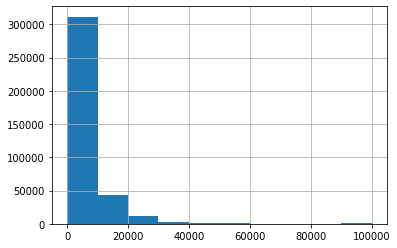

In [8]:
cars.price.hist()

In [9]:
cars['price_log'] = np.log(cars['price'])

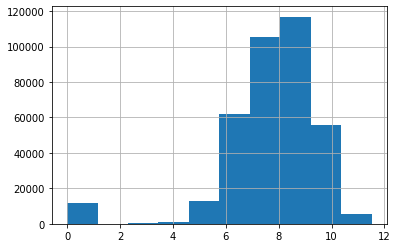

In [10]:
cars.price_log.hist()

In [11]:
cars.describe(include=['object'])

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
count,371824,371824,371824,371824,371824,333925,351601,351326,338409,371824,299700,371824,371824
unique,280652,233670,2,2,2,8,2,251,7,40,2,114,182904
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,test,limousine,manuell,golf,benzin,volkswagen,nein,2016-04-03 00:00:00,2016-04-07 06:45:59
freq,7,657,371821,371812,192733,95963,274432,30086,224038,79695,263390,14470,17


In [12]:
cars.isna().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37899
yearOfRegistration         0
gearbox                20223
powerPS                    0
model                  20498
kilometer                  0
monthOfRegistration        0
fuelType               33415
brand                      0
notRepairedDamage      72124
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
price_log                  0
dtype: int64

# Обработка данных

In [13]:
for col in cars.columns:
    if len(cars[col].unique()) <= 10:
        print()
        print(col.upper())
        print(cars[col].value_counts())
        print('---------------------')


SELLER
privat        371821
gewerblich         3
Name: seller, dtype: int64
---------------------

OFFERTYPE
Angebot    371812
Gesuch         12
Name: offerType, dtype: int64
---------------------

ABTEST
test       192733
control    179091
Name: abtest, dtype: int64
---------------------

VEHICLETYPE
limousine     95963
kleinwagen    80098
kombi         67626
bus           30220
cabrio        22914
coupe         19026
suv           14716
andere         3362
Name: vehicleType, dtype: int64
---------------------

GEARBOX
manuell      274432
automatik     77169
Name: gearbox, dtype: int64
---------------------

FUELTYPE
benzin     224038
diesel     107826
lpg          5382
cng           571
hybrid        280
andere        208
elektro       104
Name: fuelType, dtype: int64
---------------------

NOTREPAIREDDAMAGE
nein    263390
ja       36310
Name: notRepairedDamage, dtype: int64
---------------------

NROFPICTURES
0    371824
Name: nrOfPictures, dtype: int64
---------------------


In [14]:
del cars['nrOfPictures']

In [15]:
cars.loc[0, 'name'].split('_')[0]

'Golf'

In [16]:
cars['topic'] = [i.split('_')[0].lower() for i in cars.name]

In [17]:
cars.topic.unique()

array(['golf', 'a5', 'jeep', ..., 'handa', 'angestellte', 'renanult'],
      dtype=object)

In [18]:
cars.brand.unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet',
       'dacia', 'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar',
       'daewoo', 'rover', 'land_rover', 'lada'], dtype=object)

In [19]:
cars.loc[cars.topic == 'vw', 'topic'] = 'volkswagen'
cars.loc[cars.topic == 'alfa', 'topic'] = 'alfa_romeo'
cars.loc[cars.topic == 'mercedes', 'topic'] = 'mercedes_benz'
cars.loc[cars.topic == 'land', 'topic'] = 'land_rover'

In [20]:
cars.loc[(cars.topic == cars.brand) | (cars.topic == cars.model), 'topic'] = 'sell'
cars.loc[cars.topic == 'citroлn', 'topic'] = 'sell'
cars.loc[cars.topic == 'verkaufe', 'topic'] = 'sell'
cars.loc[cars.topic == 'dodge', 'topic'] = 'sell'
cars.loc[cars.topic == 'land', 'topic'] = 'sell'
cars.loc[cars.topic == 'tausche', 'topic'] = 'exchange'


In [21]:
cars[(cars.topic != cars.brand) & (cars.topic != cars.model)]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,price_log,topic
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,6.2,sell
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,9.8,a5
2,2016-03-14 12:52:21,Jeep_Grand_Cherokee_Overland,privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,9.2,sell
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,7.3,sell
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,8.2,sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371819,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,39576,2016-04-06 00:46:52,7.7,suche
371820,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,26135,2016-03-11 18:17:12,7.1,sell
371821,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,87439,2016-04-07 07:15:26,9.1,sell
371822,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,40764,2016-03-24 12:45:21,8.1,sell


In [22]:
cars[cars.topic == 'passat']

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,price_log,topic
450,2016-03-27 18:43:25,Passat_fuer_ausschalten,privat,Angebot,1300,control,NaN,2017,manuell,150,NaN,150000,10,NaN,volkswagen,nein,2016-03-27 00:00:00,70374,2016-04-05 15:15:29,7.2,passat
5067,2016-03-16 11:55:52,Passat_cc,privat,Angebot,1,test,limousine,2009,manuell,201,cc,80000,0,benzin,volkswagen,NaN,2016-03-16 00:00:00,42329,2016-04-06 06:16:42,0.0,passat
8526,2016-03-27 18:44:41,Passat_Variant_4_Motion,privat,Angebot,2600,control,kombi,2002,manuell,131,NaN,150000,2,diesel,volkswagen,nein,2016-03-27 00:00:00,38108,2016-03-29 08:16:10,7.9,passat
9658,2016-03-28 23:37:38,Passat_3C_2.0_TDI_DPF_DSG_HIGHLINE,privat,Angebot,7300,test,kombi,2005,automatik,140,NaN,150000,12,diesel,volkswagen,nein,2016-03-28 00:00:00,18069,2016-04-05 14:16:28,8.9,passat
11863,2016-03-26 17:50:01,Passat_VR6_Exklusiv,privat,Angebot,4000,control,NaN,1995,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-03-26 00:00:00,6749,2016-03-29 20:45:11,8.3,passat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355220,2016-03-10 09:56:09,Passat_3b_1.9_TDI_Highline__angemeldet_mit_tuv_neu,privat,Angebot,3200,test,kombi,2003,manuell,131,NaN,150000,7,NaN,volkswagen,nein,2016-03-10 00:00:00,28259,2016-04-06 07:16:57,8.1,passat
355539,2016-03-12 11:55:28,Passat_3b_1.8t_Turbo_TЬV_neu_gemachter_Motor_TAUSCHE_EVENTUELL,privat,Angebot,1200,test,kombi,1997,manuell,180,NaN,5000,0,NaN,volkswagen,NaN,2016-03-12 00:00:00,8468,2016-03-15 15:16:52,7.1,passat
356054,2016-03-19 22:52:20,Passat_CC_TDI_2.0_Panoramadach_Automatik_DSG,privat,Angebot,16800,test,coupe,2010,automatik,170,cc,80000,1,diesel,volkswagen,nein,2016-03-19 00:00:00,52068,2016-03-26 10:18:02,9.7,passat
359225,2016-03-27 15:57:43,Passat_TЬV_neu,privat,Angebot,8500,control,limousine,2006,NaN,170,NaN,125000,4,diesel,volkswagen,NaN,2016-03-27 00:00:00,38536,2016-03-29 05:16:23,9.0,passat


In [23]:
pd.DataFrame(cars.topic.value_counts()).describe()

,topic
count,5595.0
mean,66.5
std,4462.1
min,1.0
25%,1.0
50%,1.0
75%,2.0
max,333751.0


In [24]:
pd.DataFrame(cars.topic.value_counts()).head(50)

,topic
sell,333751
suche,1651
top,1114
exchange,954
auto,940
zu,788
gepflegter,764
sehr,754
golf,712
schoener,668


In [25]:
cars[cars.topic == 'top']

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,price_log,topic
471,2016-03-19 18:38:15,Top_gepflegter_Audi_A6_Avant_S_Line_2.0_TDI_/_AHK_Standheizung,privat,Angebot,14500,test,kombi,2007,manuell,140,a6,100000,3,diesel,audi,nein,2016-03-19 00:00:00,94060,2016-04-07 05:17:33,9.6,top
563,2016-03-15 17:43:21,Top_zustand,privat,Angebot,2600,control,NaN,2005,NaN,0,NaN,125000,0,NaN,chevrolet,NaN,2016-03-15 00:00:00,94315,2016-04-06 14:45:44,7.9,top
843,2016-03-07 21:57:39,TOP___BMW_E46_328i_Touring___160000___TЬV_02/2017,privat,Angebot,3999,control,kombi,1999,automatik,193,3er,150000,12,benzin,bmw,nein,2016-03-07 00:00:00,48159,2016-04-06 19:46:34,8.3,top
900,2016-04-02 13:50:51,top__Zustand__noch_tuev_und_wenige_Kilometer__guenstig_abzugeben,privat,Angebot,380,test,NaN,2016,manuell,54,NaN,100000,0,benzin,skoda,ja,2016-04-02 00:00:00,3046,2016-04-02 13:50:51,5.9,top
957,2016-03-26 18:44:52,Top_transporter_mit_wenig_km,privat,Angebot,3100,test,andere,2001,manuell,90,NaN,70000,7,diesel,kia,nein,2016-03-26 00:00:00,39218,2016-04-06 07:45:41,8.0,top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370390,2016-03-05 16:46:56,TOP_audi_a3_mit_Tuev,privat,Angebot,799,control,NaN,2017,manuell,0,a3,150000,10,benzin,audi,ja,2016-03-05 00:00:00,91560,2016-03-05 19:46:22,6.7,top
370859,2016-03-31 13:44:40,Top_gepflegter_Kia_Venga_1.6_CVVT_Edition_7,privat,Angebot,10750,control,limousine,2012,manuell,126,andere,50000,12,benzin,kia,nein,2016-03-31 00:00:00,10243,2016-04-07 10:36:38,9.3,top
371222,2016-03-11 11:25:24,Top_zuverlaessiger_Toyota_Corolla!,privat,Angebot,820,test,limousine,1996,manuell,75,corolla,150000,11,benzin,toyota,nein,2016-03-11 00:00:00,35232,2016-03-11 11:25:24,6.7,top
371536,2016-03-16 13:50:12,TOP_AUSSTATTUNG__SCHECKHEFTGEPFLEGT__NICHTRAUCHER,privat,Angebot,15550,control,limousine,2006,automatik,334,a6,90000,1,benzin,audi,NaN,2016-03-16 00:00:00,82152,2016-04-06 11:16:18,9.7,top


In [26]:
topics = pd.DataFrame(cars.topic.value_counts() > 100 ).reset_index()
topics.columns = ['topic', 'boolea']

cars = cars.merge(topics, how='left', on='topic')

cars.loc[cars.boolea == 0, 'topic'] = 'another'

del cars['boolea']

cars.corr()['price']

price                  1.0
yearOfRegistration     0.2
powerPS                0.5
kilometer             -0.4
monthOfRegistration    0.1
postalCode             0.1
price_log              0.6
Name: price, dtype: float64

In [27]:
df = cars.copy()

In [28]:
df.isna().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37899
yearOfRegistration         0
gearbox                20223
powerPS                    0
model                  20498
kilometer                  0
monthOfRegistration        0
fuelType               33415
brand                      0
notRepairedDamage      72124
dateCreated                0
postalCode                 0
lastSeen                   0
price_log                  0
topic                      0
dtype: int64

In [29]:
df = df.fillna('Unknown')

In [30]:
df = df.drop(['dateCrawled', 'postalCode', 'lastSeen', 'dateCreated', 'name'], axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371824 entries, 0 to 371823
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   seller               371824 non-null  object 
 1   offerType            371824 non-null  object 
 2   price                371824 non-null  int64  
 3   abtest               371824 non-null  object 
 4   vehicleType          371824 non-null  object 
 5   yearOfRegistration   371824 non-null  int64  
 6   gearbox              371824 non-null  object 
 7   powerPS              371824 non-null  int64  
 8   model                371824 non-null  object 
 9   kilometer            371824 non-null  int64  
 10  monthOfRegistration  371824 non-null  int64  
 11  fuelType             371824 non-null  object 
 12  brand                371824 non-null  object 
 13  notRepairedDamage    371824 non-null  object 
 14  price_log            371824 non-null  float64
 15  topic            

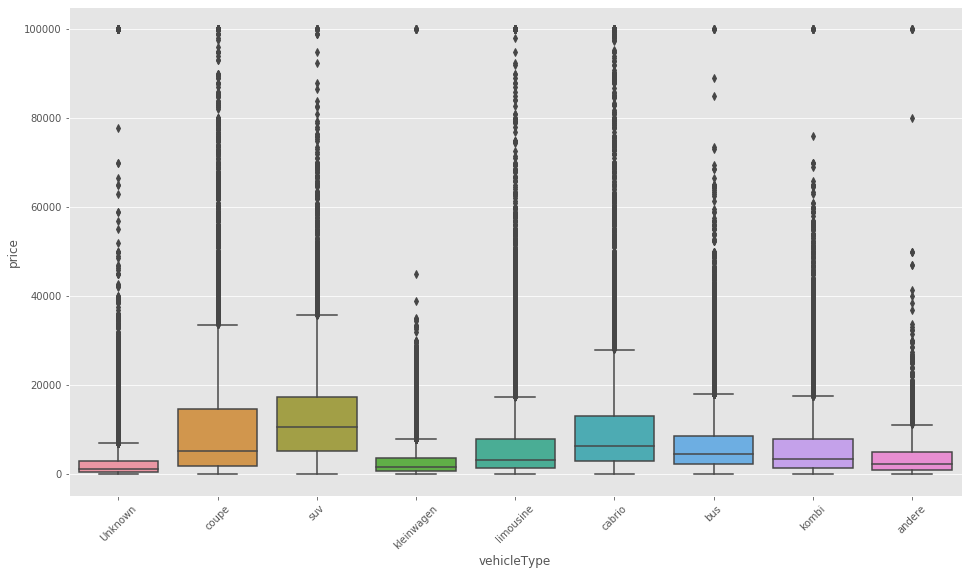

In [101]:
import seaborn as sns
sns.boxplot(x='vehicleType', y="price", data=df)
plt.rcParams['figure.figsize'] = (16,9)
plt.xticks(rotation=45);

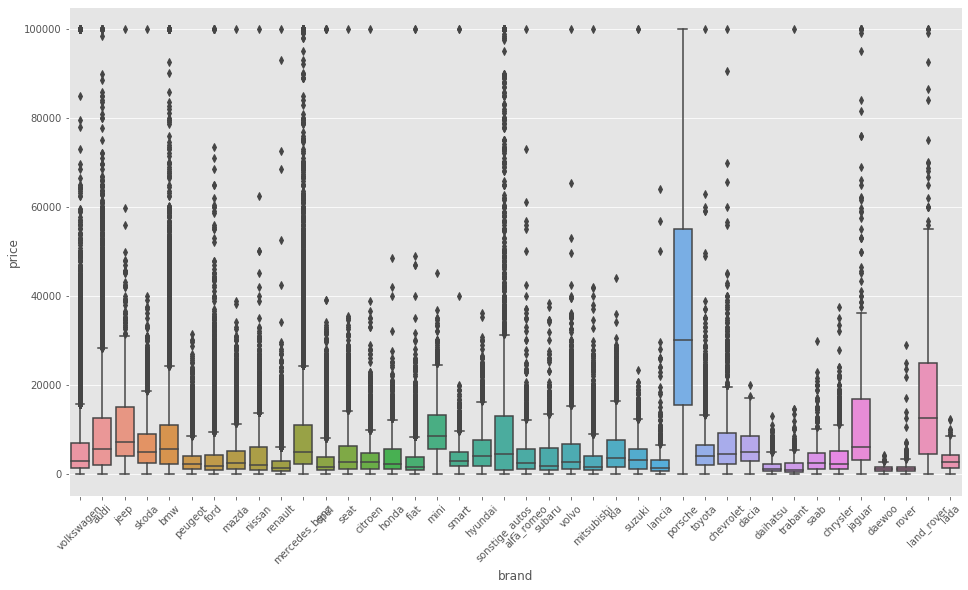

In [103]:
sns.boxplot(x='brand', y="price", data=df)
plt.rcParams['figure.figsize'] = (18,12)
plt.xticks(rotation=45);

###### Код работает очень-очень долго, я позволил себе провести обучение на очень маленькой выборке
###### модель на 10 тысяч сэмплов обучается стандартно 20 секунд

In [70]:
def choose_type(df, ledum):
    if ledum == 1:
        dummy_df = pd.get_dummies(df)
        dummy_df = dummy_df.sample(10000, random_state=123)
        X = dummy_df.drop(['price', 'price_log'], axis=1)
        y = dummy_df['price_log']
        
        return X, y
    
    if ledum == 2:
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        le_df = df.copy()
        le_df = le_df.sample(10000)
        y = le_df['price_log']
        X = le_df.drop(['price', 'price_log'], axis=1)
        for col in X.columns:
            X[col] = le.fit_transform(X[col])
        
        return X, y

# Построение модели

In [56]:
X, y = choose_type(df, 1)

In [57]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=123)

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [90]:
import time
start_time = time.time()

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rfr = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
lin_reg = LinearRegression()
lasso_cv = LassoCV()
ridge_cv = RidgeCV()
lasso = Lasso()
ridge = Ridge()

models = [rfr, gbr, lin_reg, lasso_cv, ridge_cv, lasso, ridge]

tables = pd.DataFrame()
names = []
cross_vals = []
mae = []
mae_exp = []
rmse = []

for model in models:
    
    model.fit(X_train, y_train)
    names.append(str(model).split('(')[0])
    cross_vals.append(cross_val_score(model, X_train, y_train, cv=3).mean())
    mae.append(mean_absolute_error(model.predict(X_valid), y_valid))
    mae_exp.append(mean_absolute_error(np.exp(model.predict(X_valid)), np.exp(y_valid)))
    rmse.append(np.sqrt(mean_squared_error(model.predict(X_valid), y_valid)))
    
    print('{} done'.format(str(model).split('(')[0]))

tables['Names'] = names
tables['CV'] = cross_vals
tables['MAE'] = mae
tables['MAEexp'] = mae_exp
tables['RMSE'] = rmse

print("--- %s seconds ---" % (time.time() - start_time))

RandomForestRegressor done
GradientBoostingRegressor done
LinearRegression done
LassoCV done
RidgeCV done
Lasso done
Ridge done
--- 70.84200119972229 seconds ---


In [91]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
tables.sort_values(by="MAE")

,Names,CV,MAE,MAEexp,RMSE
1,GradientBoostingRegressor,0.470,0.655,1994.037,1.289
0,RandomForestRegressor,0.425,0.667,1714.715,1.348
4,RidgeCV,0.386,0.809,2683.512,1.406
6,Ridge,0.378,0.814,2711.147,1.410
5,Lasso,0.229,0.957,3599.157,1.614
3,LassoCV,0.205,1.001,3641.544,1.654
2,LinearRegression,-76334678512.367,668.453,2768.936,17910.515


In [71]:
X, y = choose_type(df, 2)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=123)
# Модель через labelencoder
rfr2 = RandomForestRegressor(random_state=42)
import time
start_time = time.time()
rfr2.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 3.144479274749756 seconds ---


In [72]:
mean_absolute_error(rfr2.predict(X_valid), y_valid)

0.7391961097373362

In [73]:
mean_absolute_error(np.exp(rfr2.predict(X_valid)), np.exp(y_valid))

1954.400110312292

In [74]:
np.sqrt(mean_squared_error(rfr2.predict(X_valid), y_valid))

1.4658640310799314

In [75]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
mean_absolute_error(lin_reg2.predict(X_valid), y_valid)

0.8645165715486992

In [77]:
mean_absolute_error(np.exp(lin_reg2.predict(X_valid)), np.exp(y_valid))

2760.1705381441275

In [78]:
np.sqrt(mean_squared_error(lin_reg2.predict(X_valid), y_valid))

1.5468671611487366

In [92]:
tables.sort_values(by="MAE")

,Names,CV,MAE,MAEexp,RMSE
1,GradientBoostingRegressor,0.470,0.655,1994.037,1.289
0,RandomForestRegressor,0.425,0.667,1714.715,1.348
4,RidgeCV,0.386,0.809,2683.512,1.406
6,Ridge,0.378,0.814,2711.147,1.410
5,Lasso,0.229,0.957,3599.157,1.614
3,LassoCV,0.205,1.001,3641.544,1.654
2,LinearRegression,-76334678512.367,668.453,2768.936,17910.515


``` Пусть и на малом наборе данных, тип разделения методом get_dummies() показал лучше результаты, нежели labelencoding. Также, исходя из таблицы tables, лучше всего показывают себя GBR и RFR на порядок. Есть смысл их улучшить и подобрать гиперпараметры, но помнить, что все это обучается на более маленькой выборке (обучение методом RFR стандартно выборки проходило почти час). ```

In [80]:
X, y = choose_type(df, 1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=123)

In [81]:
from sklearn.model_selection import GridSearchCV

params = {"n_estimators" : [50, 100],
         "min_samples_leaf": [1, 2, 5],
         "min_samples_split": [2, 4, 8]} 

gs = GridSearchCV(rfr, params, n_jobs=-1)

In [82]:
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [83]:
gs.best_params_

{'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}

In [84]:
rfr_best = gs.best_estimator_

In [85]:
rfr_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

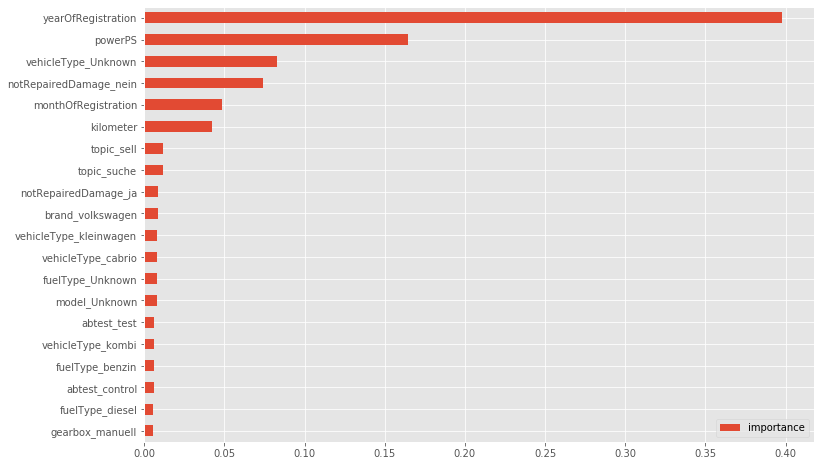

In [86]:
imp = pd.DataFrame(rfr_best.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').tail(20).plot(kind='barh', figsize=(12, 8))

In [87]:
mean_absolute_error(rfr_best.predict(X_valid), y_valid)

0.6520570353032339

In [88]:
mean_absolute_error(np.exp(rfr_best.predict(X_valid)), np.exp(y_valid))

1790.5089784958543

In [89]:
np.sqrt(mean_squared_error(rfr_best.predict(X_valid), y_valid))

1.2997100606801013